# Analyzing DETE and TAFE Exit Surveys


In this report we'll be analyzing exit surveys from employees of 
the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia in an effort to solve these questions:


- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?


- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


- Does gender correlate with dissatisfied resignations?


- Which company had more dissatisfied resignations?


First let's read in the data sets:

In [1]:
import pandas as pd

dete_survey = pd.read_csv("dete_survey.csv",na_values="Not Stated")

In [2]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [5]:
tafe_survey = pd.read_csv("tafe_survey.csv")

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

When looking at both data sets we can see that a lot of the columns are not needed for our analysis and can be dropped

In [8]:
## remove columns 28 to 48
dete_survey_updated= dete_survey.drop(dete_survey.iloc[:,28:49],axis=1)

In [9]:
## remove columns 17 to 65
tafe_survey_updated = tafe_survey.drop(tafe_survey.iloc[:,17:66],axis=1)

In [10]:
## clean up column names (DETE)
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

In [11]:
## Rename columns (TAFE)
tafe_survey_updated=tafe_survey_updated.rename({'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age','Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position','LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},axis=1)

In [12]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [13]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We renamed and cleaned up columns to ease accessiblity and increased readibility. Also, some columns in the tafe survey data are the same as columns in the dete survey data, but they have a different name. We mapped these names to one another so when merged, the data is in the corresponding column

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

For our analysis we'll only be looking at survey data that has a separation type of "Resignation" as we're trying to discover resignations due to unhappiness.

Let's isolate the data that has a seperation type containing "Resignation"

In [17]:
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")]

In [18]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=="Resignation"]

In [19]:
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [20]:
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Above, we isolated all rows that have a separation type containing "Resignation" as we are trying to answer if certain employees resigned because of dissatisfaction

We weant to ensure that the dates in the date columns are accurate - latest date is lower or equal to the current year and the highest, not lower than 1940 as this would be mean the data is inaccurate. Let's take a look at the date column and clean them up accordingly 

In [21]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2012      1
07/2006      1
2010         1
Name: cease_date, dtype: int64

In [22]:
## Extracting the years
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(r"([1-2][0-9]{3})")
dete_resignations["cease_date"] =dete_resignations["cease_date"].astype(float)

In [23]:
dete_resignations["cease_date"].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [24]:
dete_resignations["dete_start_date"].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [25]:
tafe_resignations["cease_date"].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Looking at the the various date columns of both data sets we can see that neither of them exceed our restrictions in terms of time periods. We needed to verify this to ensure the data collected is accurate

## Calculating Years of Service

We'll calculate the years of service as we need this column to answer the question:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [26]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

In [27]:
dete_resignations["institute_service"]

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

The tafe dataset already has a years of service column ("institute_service"). In order to analyze both surveys together we created a column by the same name in the dete dataset

## Identifying Dissatisifed Employees

In [28]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [29]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Above, we see that two types of dissatisfation (general and job) have 2 unique values making up their columns. To easier analyze this data we can convert the values in the column to boolean values(True or False)

In [30]:
import numpy as np

## convert job dissatisfaction tables to boolean equaivalents
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    else:
        return True

In [31]:
## if either column is true indicate dissatisfaction in dissatisfied column
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction","Contributing Factors. Job Dissatisfaction"]].applymap(update_vals).any(axis=1,skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

The DETE survey dataset has a lot more columns indicating dissatisfaction, but all these columns are already boolean columns so we can use the df.any() functions to identify dissatisfaction immediately

In [32]:
dete_resignations[["job_dissatisfaction",
                   "dissatisfaction_with_the_department",
                   "physical_work_environment",
                   "lack_of_recognition",
                   "lack_of_job_security",
                   "work_location",
                   "employment_conditions",
                   "work_life_balance",
                   "workload"]]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False
819,False,False,False,False,False,False,False,True,False


In [33]:
## Evaluates to true if any of the values are true
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
                   "dissatisfaction_with_the_department",
                   "physical_work_environment",
                   "lack_of_recognition",
                   "lack_of_job_security",
                   "work_location",
                   "employment_conditions",
                   "work_life_balance",
                   "workload"]].any(axis=1,skipna=False)
dete_resignations_up=dete_resignations.copy()

In [34]:
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64


Grouping columns that make up dissatisfaction helps us retrieve one value for the dissatisfied column. We checked if any of the specified columns had a true value for each given row indicating that they were disastisfied if so, that row would be a dissatisfied row.



## Combining the DETE and TAFE Datasets

Working with the datasets individually is fine and we'll do that in latter part of the analysis, but for now let's combine the data sets. 

We'll start by adding an institute column identifying which dataset each row of the survey data is from

In [35]:
dete_resignations_up["institute"] = "DETE"

In [36]:
tafe_resignations_up["institute"] = "TAFE"

In [37]:
## concatenate the two survey datasets
combined= pd.concat([dete_resignations_up,tafe_resignations_up])

In [38]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 53 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separationtype                                       651 non-null    object 
 2   cease_date                                           635 non-null    float64
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

We still have some columns that aren't needed for our analysis. Let's drop these columns

In [39]:
## drop columns with less than 500 non null values
combined_updated= combined.dropna(thresh=500,axis =1)

In [40]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(2), object(8)
memory usage: 55.9+ KB


In order to combine our updated datasets we first needed to add a column to indicate which data set each row is from then dropped all columns that weren't needed, in this case; columns with less than 500 non-null values, leaving us with 10 columns to work with and a more manageable dataset

## Cleaning the Combined Dataset

In [41]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [42]:
## convert institute service to string
combined_updated["institute_service"]=combined_updated["institute_service"].astype(str)

In [43]:
# cleaning columns entries/ transforming them into the same format
def clean(val):
    if pd.isna(val):
        return np.nan
    if '-' in val:
        return float(val[-1])
    else:
        return val

In [44]:
combined_updated["institute_service"]= combined_updated["institute_service"].apply(clean)

In [45]:
combined_updated["institute_service"][combined_updated["institute_service"] == "Less than 1 year"] = 1.0
combined_updated["institute_service"][combined_updated["institute_service"] == "More than 20 years"] = 20.0
combined_updated["institute_service"] = combined_updated["institute_service"].astype(float)

In [46]:
## convert year values to respective categories
def map_year(val):
    if (pd.isnull(val)):
        return np.nan
    elif val < 3:
        return "New"
    elif val<6:
        return "Experienced"
    elif val<10:
        return "Established"
    else:
        return "Veteran"

In [47]:
combined_updated["service_cat"] = combined_updated["institute_service"].apply(map_year)

In [48]:
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    float64
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
 10  service_cat        563 non-null    object 
dtypes: float64(3), object(8)
memory usage: 61.0+ KB


The values in the institute_service column weren't uniform so we extracted the years from the column and described the amount of years as categories (New, Experienced, Established and Veteran) depending on which range they fall between

In [49]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [50]:
combined_updated["dissatisfied"]=combined_updated["dissatisfied"].fillna(False)

Above we decided to replace the null values with the higher occuring boolean value - in this case false


In [51]:
##Calculate the percentage of dissatisfied employees in each group
combined_updated.pivot_table(index="service_cat",values="dissatisfied")

,dissatisfied
service_cat,
Established,0.505882
Experienced,0.327869
New,0.287500
Veteran,0.534483


Text(0, 0.5, 'Dissatisfaciton Proportion')

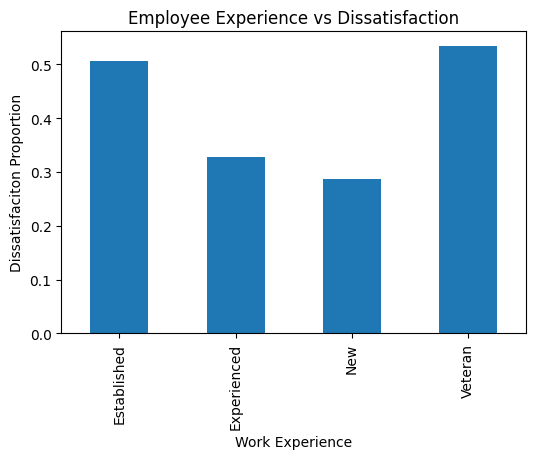

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

combined_updated.pivot_table(index="service_cat",values="dissatisfied").plot.bar(legend=False)
plt.title("Employee Experience vs Dissatisfaction")
plt.xlabel("Work Experience")
plt.ylabel("Dissatisfaciton Proportion")



We can see that the amount of employees who resigned due to dissatisfaction is greater among the longer serviced employees; those that are under the "Established" and "Veteran" category"

Now let's see if the age of employees has any correlation with their desire to resign

In [53]:
combined_updated["age"].value_counts(dropna=False).sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

The ages are difficult to analyze as they are. Let's extract the ages and distribute them to their appropriate categories

In [54]:
combined_updated["age"] = combined_updated["age"].str.extract(r'(\d+)').astype(float)

In [55]:
combined_updated["age"].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
NaN     55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

In [56]:
def age_category(val):
    if pd.isnull(val):
        return np.nan
    elif val <=30:
        return "Junior"
    elif val <=40:
        return "Senior"
    elif val <=50:
        return "Executive"
    else:
        return "Retiree"

In [57]:
combined_updated["age_cat"]=combined_updated["age"].apply(age_category)

Text(0, 0.5, 'Dissatisfaction Proportion')

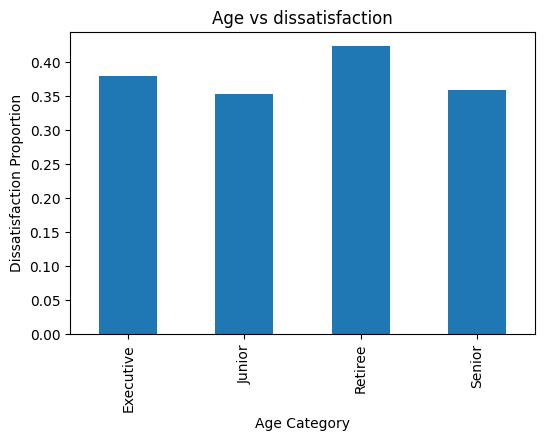

In [58]:
combined_updated.pivot_table(index="age_cat",values="dissatisfied").plot.bar(legend=False)
plt.title("Age vs dissatisfaction")
plt.xlabel("Age Category")
plt.ylabel("Dissatisfaction Proportion")

Looking at the age data we can see that older employees closer to the age of retirement resigned due to dissatsifiaction as oppose to junior employees

## Causes of Dissatisfaction

Above, we see that older employees tend to be more dissatisfied when resigning. Let's see the leading causes as to why each age group is retiring

Starting with the DETE survey data:

In [59]:
dete_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    float64
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [60]:
dete_resignations_up["age"].value_counts(dropna=False)

41-45            48
46-50            42
36-40            41
26-30            35
51-55            32
21-25            29
31-35            29
56-60            26
61 or older      23
NaN               5
20 or younger     1
Name: age, dtype: int64

In [61]:
## group resignations by age
dete_resignations_age = dete_resignations_up.groupby("age").mean()

In [62]:
## select the first set of dissatisfaction columns
dete_resignations_col1= dete_resignations_age.iloc[:,6:12]

In [63]:
## select the second set of dissatisfaction columns
dete_resignations_col2 = dete_resignations_age.iloc[:,[13,20]]

In [64]:
## join the two dataframes on their index(age)
dete_resignations_causes = dete_resignations_col1.join(dete_resignations_col2)

Text(0.5, 1.0, 'Causes of Resignation by Age (DETE)')

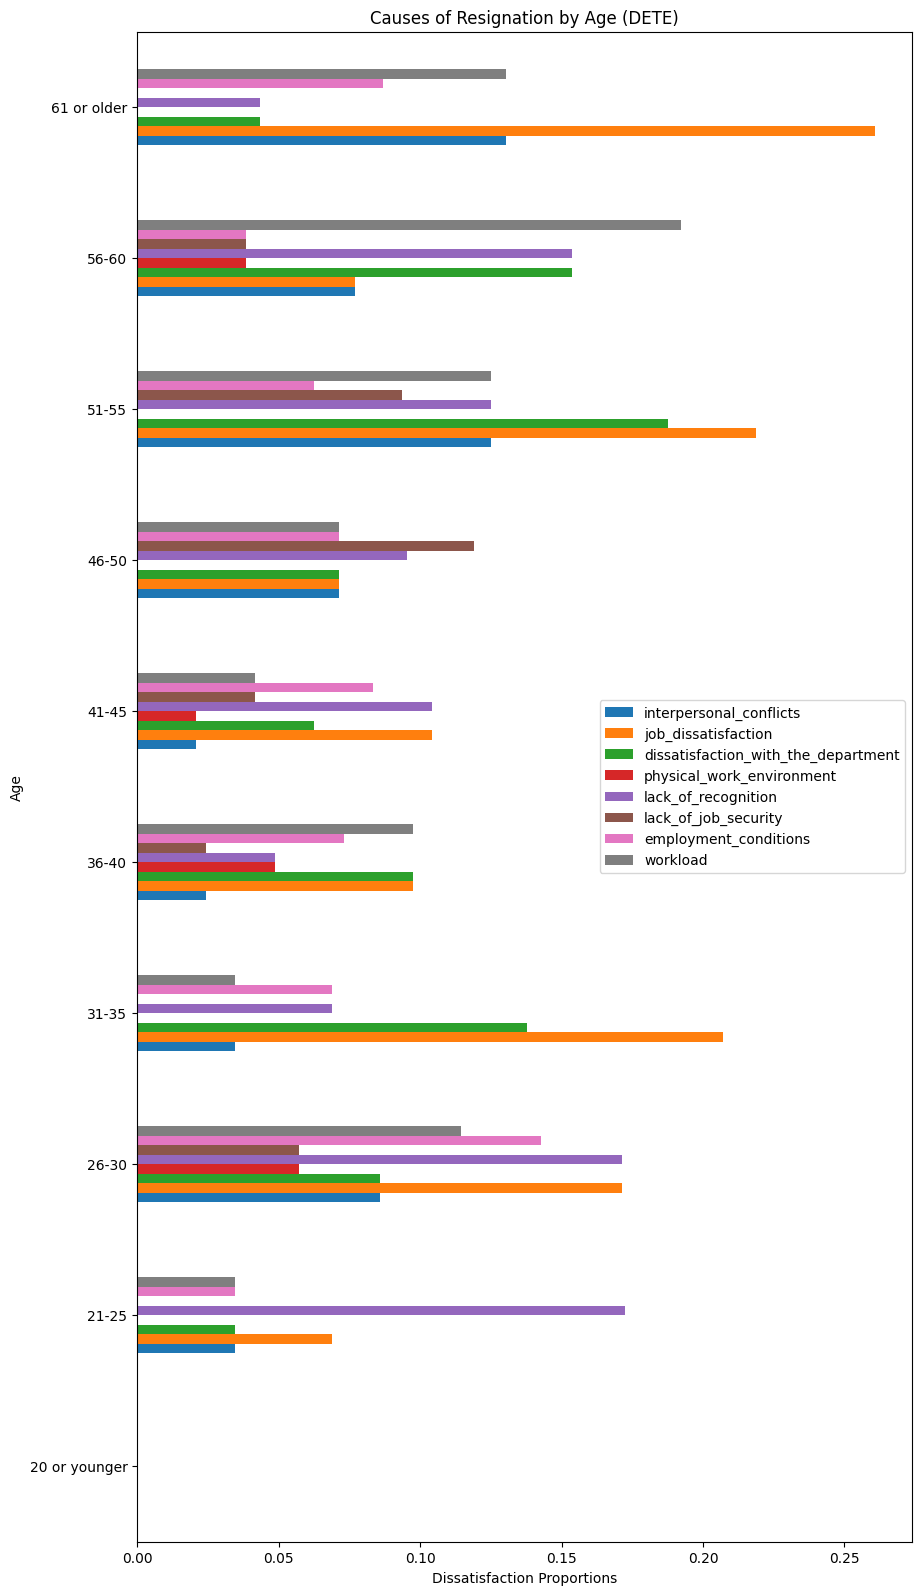

In [65]:
## plot causes of dissatisfaction
ax = dete_resignations_causes.plot.barh(figsize=(10,20))
ax.legend(loc="center right")
ax.set_xlabel("Dissatisfaction Proportions")
ax.set_ylabel("Age")
ax.set_title("Causes of Resignation by Age (DETE)")

When looking at the DETE survey data set; resignation due to lack of recognition is the leading cause in the younger age groups (21-30) while in the older age groups(51-61), workload and interpersonal conflicts are the causes that stand out

Let's take a look at the TAFE dataset

In [66]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

The TAFE dataset doesn't seem to have many specific columns indicating reasons of dissatisfaction other than the job dissatisfaction columns themselves and the interpersonal conflicts column. Let's take a look at these columns specifically

In [67]:
tafe_resignations_up["Contributing Factors. Interpersonal Conflict"].value_counts()

-                         308
Interpersonal Conflict     24
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

In [68]:
tafe_resignations_up["Contributing Factors. Interpersonal Conflict"] = tafe_resignations_up["Contributing Factors. Interpersonal Conflict"].apply(update_vals)

In [69]:
tafe_resignations_up["Contributing Factors. Interpersonal Conflict"].value_counts(dropna=False)

False    308
True      24
NaN        8
Name: Contributing Factors. Interpersonal Conflict, dtype: int64

In [70]:
tafe_resignations_up["Contributing Factors. Interpersonal Conflict"]=tafe_resignations_up["Contributing Factors. Interpersonal Conflict"].fillna(False)

In [71]:
tafe_resignations_up["Contributing Factors. Dissatisfaction"]=tafe_resignations_up["Contributing Factors. Dissatisfaction"].apply(update_vals)

In [72]:
tafe_resignations_up["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [73]:
tafe_resignations_up["Contributing Factors. Dissatisfaction"]=tafe_resignations_up["Contributing Factors. Dissatisfaction"].fillna(False)

In [74]:
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"] = tafe_resignations_up["Contributing Factors. Job Dissatisfaction"].apply(update_vals)

In [75]:
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [76]:
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"] = tafe_resignations_up["Contributing Factors. Job Dissatisfaction"].fillna(False)

Just like we did above, we converted the columns to boolean values and replaced the null values with the boolean value that occured more frequently to essentially convert the column type to boolean for easier analysis

In [77]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [78]:
tafe_resignations_up["age"].value_counts()

41  45           45
51-55            39
46  50           39
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
20 or younger     9
Name: age, dtype: int64

In [79]:
tafe_resignations_up["age"]=tafe_resignations_up["age"].str.extract(r'(\d+)').astype(float)

In [80]:
tafe_resignations_up["age"].value_counts()

41.0    45
51.0    39
46.0    39
21.0    33
26.0    32
31.0    32
36.0    32
56.0    29
20.0     9
Name: age, dtype: int64

In [81]:
import math
def age_cat(val):
    if math.isnan(val):
        return np.nan
    elif val <=20:
        return "20 or younger"
    elif val <= 30:
        return "20-30"
    elif val <= 40:
        return "30-40"
    elif val <= 50:
        return "40-50"
    else:
        return "50 or older"

In [82]:
tafe_resignations_up["age_cat"] = tafe_resignations_up["age"].apply(age_cat)

In [83]:
tafe_resignations_up["age_cat"].value_counts()

40-50            84
50 or older      68
20-30            65
30-40            64
20 or younger     9
Name: age_cat, dtype: int64

We cleaned up the age columns, converted them to floats then organized them in to corresponding categories to create a consistant column  

In [84]:
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

In [85]:
## group by age and isolate dissatisfaction columns
tafe_resignations_age = tafe_resignations_up.groupby("age_cat").mean()
tafe_resignations_age = tafe_resignations_age[["Contributing Factors. Interpersonal Conflict", "Contributing Factors. Job Dissatisfaction", "Contributing Factors. Dissatisfaction"]]

Text(0, 0.5, 'Amount Dissatisfied Proportion')

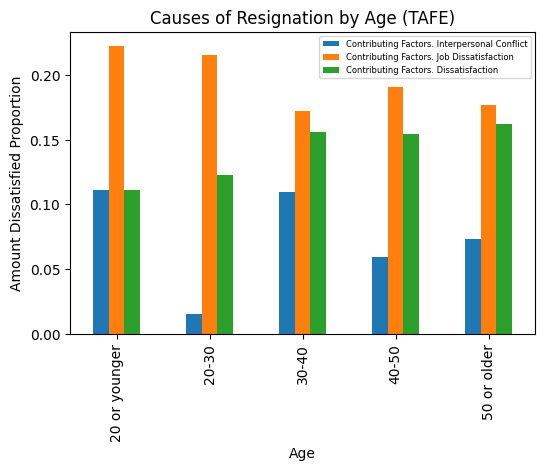

In [86]:
tafe_resignations_age.plot.bar().legend(prop={'size': 6})
plt.title("Causes of Resignation by Age (TAFE)")
plt.xlabel("Age")
plt.ylabel("Amount Dissatisfied Proportion")

Taking a look at the TAFE survey dataset we can see that employees aged 20 or younger and between 30 and 40 had a higher proportion of employee resignation due to interpersonal conflict

## Gender vs Dissatisfaction

In [87]:
combined_updated["gender"].value_counts()

Female    424
Male      168
Name: gender, dtype: int64

In [88]:
combined_updated["dissatisfied"].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

In [89]:
females = combined_updated[combined_updated["gender"] == "Female"]

In [90]:
males = combined_updated[combined_updated["gender"] == "Male"]

In [91]:
females["dissatisfied"].value_counts()

False    267
True     157
Name: dissatisfied, dtype: int64

In [92]:
males["dissatisfied"].value_counts()

False    101
True      67
Name: dissatisfied, dtype: int64

In [93]:
combined_updated.pivot_table(index="gender",values="dissatisfied")

,dissatisfied
gender,
Female,0.370283
Male,0.398810


Text(0, 0.5, 'Dissatisfaction Proportion')

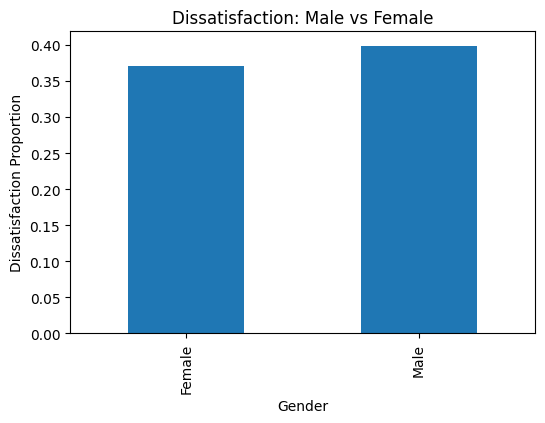

In [94]:
combined_updated.pivot_table(index="gender",values="dissatisfied").plot.bar(legend=False)
plt.title("Dissatisfaction: Male vs Female")
plt.xlabel("Gender")
plt.ylabel("Dissatisfaction Proportion")

Analyzing the gender and dissatisfaction columns shows us that males (39%) have a higher proportion of dissatisfied resignations than females (37%), but the difference in the amount (2%) is negligible so there seems to be no correlation between gender and dissatisfaction

## DETE vs TAFE

We combined the data and evaluated the dissatsified employees who resigned from both the DETE and TAFE survey. Let's see which set of employees were more dissatisfied

In [95]:
## sum up the number of dissatisfied employees in the DETE survey
dete_dissatisfied = dete_resignations_up["dissatisfied"].sum()

In [96]:
dete_dissatisfied

149

In [97]:
## sum up the number of dissatisfied employees in the TAFE survey
tafe_dissatisfied = tafe_resignations_up["dissatisfied"].sum()

In [98]:
tafe_dissatisfied

91

In [99]:
dete_resignations_up.shape[0]

311

In [100]:
tafe_resignations_up.shape[0]

340

tafe seems to have more entries so let's calculate the proportion of resigned employees due to dissatisfaction on both surveys

In [101]:
dete_prop = dete_dissatisfied/dete_resignations_up.shape[0] * 100

In [102]:
tafe_prop = tafe_dissatisfied/tafe_resignations_up.shape[0] * 100

In [103]:
dete_prop

47.90996784565916

In [104]:
tafe_prop

26.764705882352942

Text(0.5, 1.0, 'DETE vs TAFE Resignations')

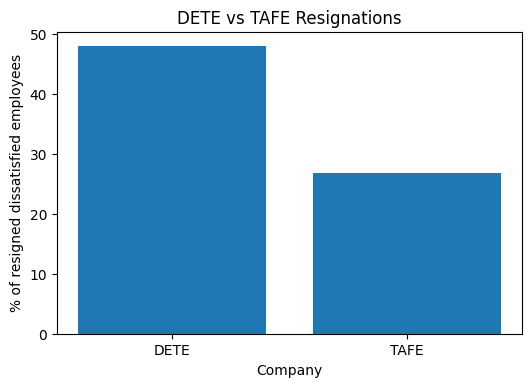

In [105]:
import matplotlib.pyplot as plt

plt.bar(["DETE","TAFE"],[dete_prop,tafe_prop])
plt.ylabel("% of resigned dissatisfied employees")
plt.xlabel("Company")
plt.title("DETE vs TAFE Resignations")

After out analysis, we can see that DETE not only had a higher amount of dissatisfied resignations, but also had the higher proportion with 48% of resigned employees leaving dissatisfied while TAFE had 27% of its' employees resigning dissatsfied

# Summary

For this analysis we set off to answer four major questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

- Does gender correlate with dissatisfied resignations?


- Which company had more dissatisfied resignations?

First we cleaned the data - removed unnecesary columns, renamed columns and added columns as needed. Then, we combined the two survey data sets to analyze their data together and finally we analyzed the survey data for each company seperately to come to these conclusions:

1. Employees who worked longer at these companies (6+ years) had a larger proportion of dissatisfied resignations as oppose to the newer employees who resigned


2. Analyzing the age data shows us that older employees (40+) were more likely to resign dissatisfied than younger employees (<40). Younger employees more likely resigned due to lack of recognition and older employees due to workload and interpersonal conflicts


3. We came to the conclusion that gender doesn't play a role when it comes to dissatisfied employees as the difference between the proportion of male and female dissatisfied resignations is negligible (2%)


4. When looking at the survey data seperately we can see that 48% of DETE resignations were due to dissatisfaction while TAFE resignations had 27% employees resign due to dissatisfaction. DETE had 19% more resignations due to dissatisfied employees which is fairly significant